## Ejercicio Final

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Productos más Rentables

In [16]:
conn = sqlite3.connect("./../../northwind.db")
query = '''
    SELECT ProductName, SUM(Price * Quantity) as Revenue
    FROM OrderDetails od
    JOIN Products P ON p.ProductID = od.ProductID
    Group BY od.ProductID
    ORDER BY Revenue DESC
    LIMIT 10
'''

top_products = pd.read_sql_query(query,conn)

print(top_products)

               ProductName   Revenue
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


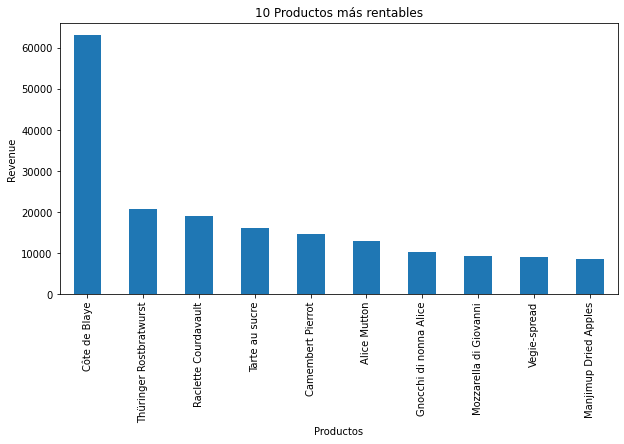

In [17]:
top_products.plot(x="ProductName", y="Revenue", kind="bar", figsize=(10, 5), legend=False)

plt.title("10 Productos más rentables")
plt.xlabel("Productos")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

### Empleados más efectivos

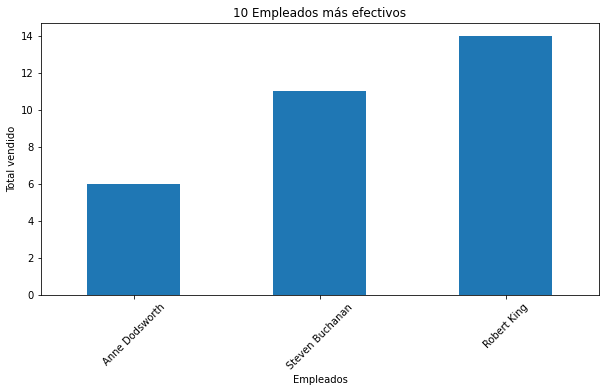

In [21]:

## Count(*) Nos cuenta todas las filas
query2 = '''
    SELECT FirstName || " " || LastName as Employee,Count(*) as Total
    FROM Orders O
    JOIN Employees e
    ON e.EmployeeID = o.EmployeeID
    Group By o.EmployeeID
    Order BY Total ASC
    LIMIT 3
'''

top_employees = pd.read_sql_query(query2,conn)
top_employees.plot(x="Employee",y="Total",kind="bar",figsize=(10,5),legend=False)

plt.title("10 Empleados más efectivos")
plt.xlabel("Empleados")
plt.ylabel("Total vendido")
plt.xticks(rotation = 45)

plt.show()